In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [5]:
book_filename= sorted(glob.glob('G:\dAtAsS\game_of_thrones\*.txt'))
book_filename

['G:\\dAtAsS\\game_of_thrones\\got1.txt',
 'G:\\dAtAsS\\game_of_thrones\\got2.txt',
 'G:\\dAtAsS\\game_of_thrones\\got3.txt',
 'G:\\dAtAsS\\game_of_thrones\\got4.txt',
 'G:\\dAtAsS\\game_of_thrones\\got5.txt']

In [6]:
corpus_raw=U''

for book in book_filename:
    print('{0}....'.format(book))
    with codecs.open(book, 'r', 'utf-8') as book_file:
        corpus_raw+=book_file.read()
    print(' Corpus is now {0} character long'.format(len(corpus_raw)))
    print()

G:\dAtAsS\game_of_thrones\got1.txt....
 Corpus is now 1770659 character long

G:\dAtAsS\game_of_thrones\got2.txt....
 Corpus is now 4071041 character long

G:\dAtAsS\game_of_thrones\got3.txt....
 Corpus is now 6391405 character long

G:\dAtAsS\game_of_thrones\got4.txt....
 Corpus is now 8107945 character long

G:\dAtAsS\game_of_thrones\got5.txt....
 Corpus is now 9719485 character long



In [7]:
tokenizer= nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer

In [8]:
raw_sentences= tokenizer.tokenize(corpus_raw)

In [9]:
def sentence_to_wordlist(raw):
    clean= re.sub('[^a-zA-Z]',' ', raw)
    words= clean.split()
    return words

In [10]:
sentences=[]
for raw_sentence in raw_sentences:
    if len(raw_sentence)>0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [11]:
raw_sentences[5]

'Heraldic crest by Virginia Norey.'

In [12]:
sentence_to_wordlist(raw_sentences[5])

['Heraldic', 'crest', 'by', 'Virginia', 'Norey']

In [13]:
token_count= sum([len(sentence) for sentence in sentences])
token_count

1818103

In [14]:
num_features=300
min_word_count=3
num_workers= multiprocessing.cpu_count()
context_size=7
downsampling=1e-3
seed=1

In [15]:
thrones2vec= w2v.Word2Vec(sg=1, seed=seed, workers=num_workers, size=num_features,
                         min_count= min_word_count, window= context_size, sample= downsampling)

C:\Users\user\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [16]:
thrones2vec.build_vocab(sentences)

In [17]:
len(thrones2vec.wv.vocab)

17277

In [18]:
thrones2vec.train(sentences)

ValueError: You must specify either total_examples or total_words, for proper job parameters updationand progress calculations. The usual value is total_examples=model.corpus_count.

In [19]:
if not os.path.exists('trained'):
    os.makedirs('trained')

In [20]:
#thrones2vec.save(os.path.join('trained','thrones2vec.w2v'))

In [21]:
tsne= sklearn.manifold.TSNE(n_components=2, random_state=0)


In [22]:
all_word_vectors_matrix= thrones2vec.wv.syn0

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [23]:
all_word_vectors_matrix_2d= tsne.fit_transform(all_word_vectors_matrix)

In [24]:
points= pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
                     ]
    ],
    columns=['word', 'x', 'y']
)

In [25]:
points.head(20)

,word,x,y
0,This,20.973185,2.553716
1,edition,-17.954380,26.619984
2,the,10.012460,8.157066
3,complete,1.121465,-17.495567
4,of,4.135546,19.482027
5,original,-10.642241,5.839700
6,hardcover,30.010101,-23.435177
7,ONE,19.898062,-27.604446
8,A,-6.020135,4.502829
9,OF,1.734494,-21.612421


In [26]:
sns.set_context('poster')


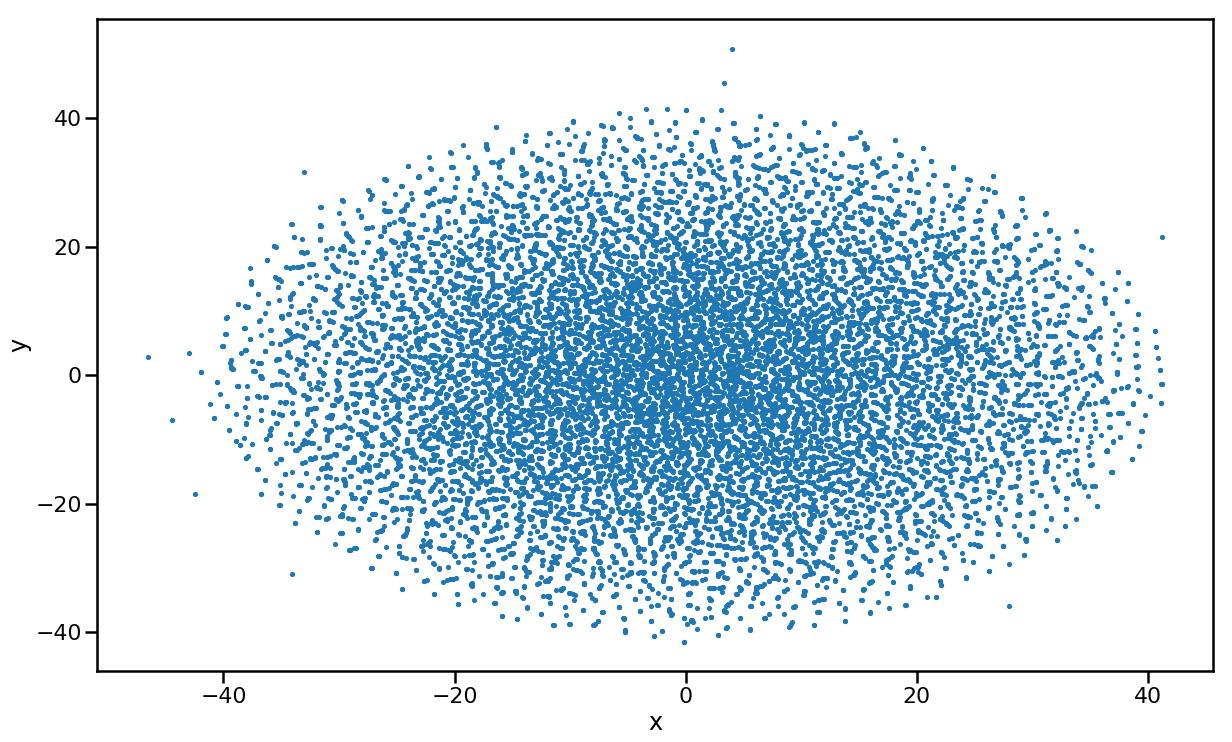

In [27]:
points.plot.scatter('x', 'y', s=10, figsize=(20,12))

In [28]:
def plot_region(x_bounds, y_bounds):
    slice=points[
        (x_bounds[0]<=points.x) &
        (points.x<= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax= slice.plot.scatter('x', 'y', s=35, figsize=(10,8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

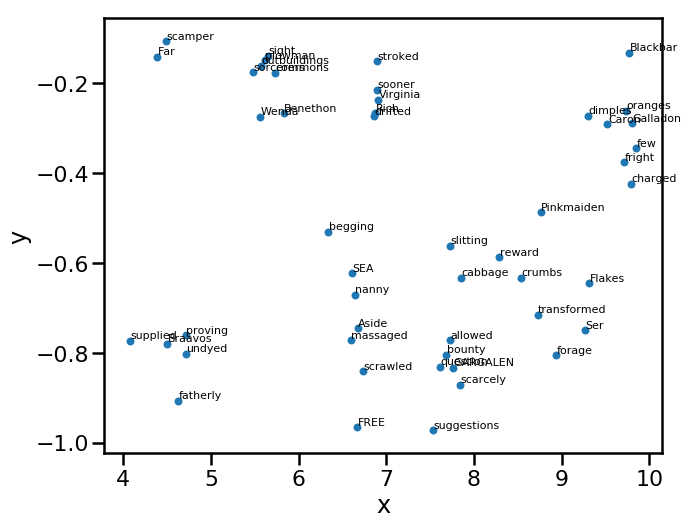

In [29]:
plot_region(x_bounds=(4.0, 10.0), y_bounds=(-1.0, -0.1))

In [30]:
#4<points.x

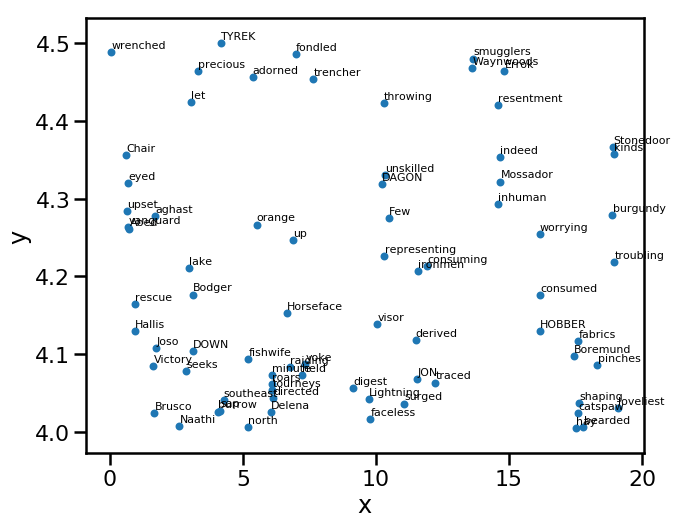

In [34]:
plot_region(x_bounds=(0,20), y_bounds=(4,4.5))

In [38]:
thrones2vec.most_similar('indeed')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Errok', 0.23484764993190765),
 ('forever', 0.2343199998140335),
 ('Mossador', 0.22363698482513428),
 ('firm', 0.2159503996372223),
 ('GILBERT', 0.21093538403511047),
 ('Hornwood', 0.19955453276634216),
 ('ignorance', 0.1983393430709839),
 ('hut', 0.19297829270362854),
 ('instant', 0.18951469659805298),
 ('became', 0.18828187882900238)]

In [41]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities= thrones2vec.most_similar_cosmul(positive=[end2, start1],
                                                  negative=[end1])
    
    start2= similarities[0][0]
    return start2

In [42]:
nearest_similarity_cosmul('Stark', 'Winterfell', 'Riverrun')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


'comfortably'